This script is the repostiry's main feature. 

Inputs are defined in the cell below.

Outputs are:
- TS and TH printed for each chosen method
- saved to out folder:
    - results.xlsx
    - Delta.png
    - Delta_boxplot.png
    - TH.png
    - TS.png

In [1]:
# Define input variables

in_dir = "../Raw Data/Applied Acoustics/"
#methods = ["beamforming", "pseudo_intensity", "allrad_decoder", "allrad2_decoder", "mad_decoder", "reference"]
methods = ["beamforming", "pseudo_intensity", "reference"]
evaluation_start_ms = 15
evaluation_stop_ms = 100
samplerate = 44100

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

from method_wrapper import method_wrapper

In [3]:
# sort folders
folders = sorted(os.listdir(in_dir))
# remove hidden folders
folders = [folder for folder in folders if '.' not in folder]



# create empty Dataframes to store results in
TH_results = pd.DataFrame()
TS_results = pd.DataFrame()
delta_results = pd.DataFrame()



# iterate through folders and methods
for folder in folders:
    print(folder)
    path = in_dir + folder + "/HOA/"
    print(path)
    for method in methods:
        try:
            TH, TS = method_wrapper(method, path, start_milliseconds = evaluation_start_ms, stop_milliseconds=evaluation_stop_ms, samplerate=samplerate)
            print(method, "TS:", TS, "TH:", TH)
        except:
            print(method, "not working")
            TH = None
            TS = None

        # save data
        TH_results.loc[folder, method] = TH
        TS_results.loc[folder, method] = TS
        try:
            delta_results.loc[folder, method] = TS - TH

        except:
            delta_results.loc[folder, method] = None


    print("")

A10p
../Raw Data/Applied Acoustics/A10p/HOA/
beamforming TS: -12.154318737071897 TH: -14.02981989497639
pseudo_intensity TS: -48.96428367487117 TH: -49.19950964234659
reference TS: -12.694100967705669 TH: -11.908589516832112

A11p
../Raw Data/Applied Acoustics/A11p/HOA/
beamforming TS: -11.420661768568575 TH: -13.273374218118226
pseudo_intensity TS: -62.902358835579896 TH: -63.93754307075058
reference TS: -12.350673513984727 TH: -11.656461692710327

A20p
../Raw Data/Applied Acoustics/A20p/HOA/
beamforming TS: -13.902144418864975 TH: -15.703450898799128
pseudo_intensity TS: -40.79326210558011 TH: -41.206173697397276
reference TS: -14.636333982242784 TH: -13.274412558850411

A21p
../Raw Data/Applied Acoustics/A21p/HOA/
beamforming TS: -13.238148547199547 TH: -15.013506571279674
pseudo_intensity TS: -31.029616945717123 TH: -31.865011142365258
reference TS: -14.69200774919978 TH: -13.251902662789206

A30p
../Raw Data/Applied Acoustics/A30p/HOA/
beamforming TS: -10.389965824213727 TH: -12.0

In [4]:
# create out folder
os.makedirs("../out", exist_ok=True)

# write dataframe to excel
with pd.ExcelWriter('../out/results.xlsx', engine='openpyxl') as writer:
    TS_results.to_excel(writer, sheet_name='TS')
    TH_results.to_excel(writer, sheet_name='TH')
    delta_results.to_excel(writer, sheet_name='delta')

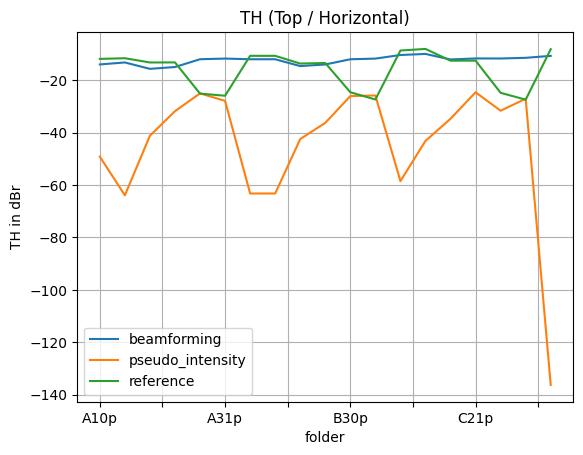

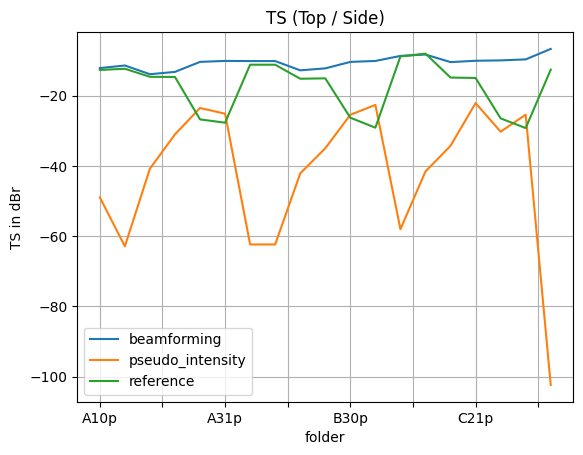

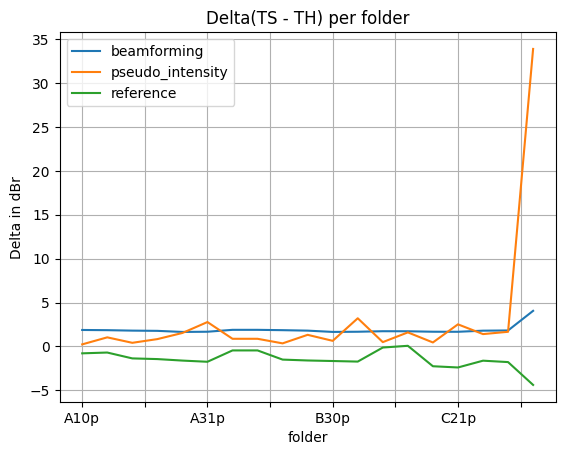

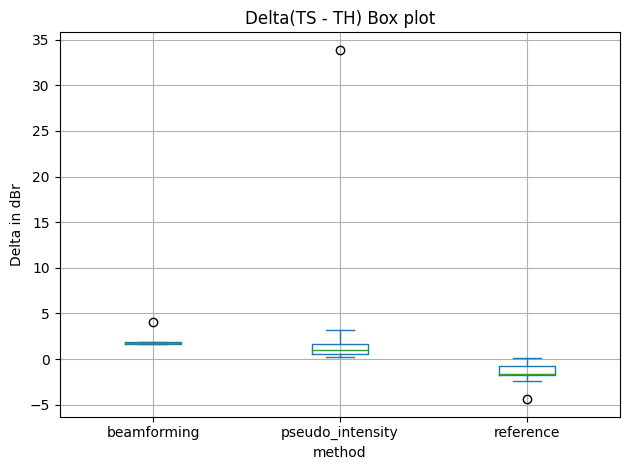

In [5]:
# plot and save results

TH_results.plot()
plt.title('TH (Top / Horizontal)')
plt.xlabel('folder')
plt.ylabel('TH in dBr')
plt.grid()

plt.savefig('../out/TH.png')
plt.show()


TS_results.plot()
plt.title('TS (Top / Side)')
plt.xlabel('folder')
plt.ylabel('TS in dBr')
plt.grid()

plt.savefig('../out/TS.png')
plt.show()


delta_results.plot()
plt.title('Delta(TS - TH) per folder')
plt.xlabel('folder')
plt.ylabel('Delta in dBr')
plt.grid()

plt.savefig('../out/Delta.png')
plt.show()


delta_results.plot(kind='box')
plt.title('Delta(TS - TH) Box plot')
plt.xlabel('method')
plt.ylabel('Delta in dBr')
plt.grid()
plt.tight_layout()
plt.savefig('../out/Delta_boxplot.png')
plt.show()
